<h1>DOB ECB Fines- a brief Analysis</h1>
<h3>Are DOB Violations precautionary or just a headache?</h3>
<p>The Department of Buildings (DOB) in New York City regulates City Construction Codes, Zoning, and  Dwelling Laws for over one million construction sites and buildings in New York City. Their aim is to enforce compliance to promote safety for workers and the public.<p> 

<p>With their annual reviews and site inspections Violations are issued across the city for a range of differnt infractions.</p>
<p>The dataset I reviewed is from the New York City Open Data source pertaining specifically to the DOB ECB (Enviornmental Control Board) violations. With 46 columns and data dating back to 19 
<h3>How many violations annualy are respondents recieving?</h3>
<h4>Below you can visualize the DOB Violation data (violations that are adjudicated by OATH/ECB)and approximately how many violations are issued each year
</h4>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
dob = pd.read_csv('DOB_ECB_Violations.csv');
dob.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1334976, 46)

In [3]:
list(dob)

['ISN_DOB_BIS_EXTRACT',
 'ECB_VIOLATION_NUMBER',
 'ECB_VIOLATION_STATUS',
 'DOB_VIOLATION_NUMBER',
 'BIN',
 'BORO',
 'BLOCK',
 'LOT',
 'HEARING_DATE',
 'HEARING_TIME',
 'SERVED_DATE',
 'ISSUE_DATE',
 'SEVERITY',
 'VIOLATION_TYPE',
 'RESPONDENT_NAME',
 'RESPONDENT_HOUSE_NUMBER',
 'RESPONDENT_STREET',
 'RESPONDENT_CITY',
 'RESPONDENT_ZIP',
 'VIOLATION_DESCRIPTION',
 'PENALITY_IMPOSED',
 'AMOUNT_PAID',
 'BALANCE_DUE',
 'INFRACTION_CODE1',
 'SECTION_LAW_DESCRIPTION1',
 'INFRACTION_CODE2',
 'SECTION_LAW_DESCRIPTION2',
 'INFRACTION_CODE3',
 'SECTION_LAW_DESCRIPTION3',
 'INFRACTION_CODE4',
 'SECTION_LAW_DESCRIPTION4',
 'INFRACTION_CODE5',
 'SECTION_LAW_DESCRIPTION5',
 'INFRACTION_CODE6',
 'SECTION_LAW_DESCRIPTION6',
 'INFRACTION_CODE7',
 'SECTION_LAW_DESCRIPTION7',
 'INFRACTION_CODE8',
 'SECTION_LAW_DESCRIPTION8',
 'INFRACTION_CODE9',
 'SECTION_LAW_DESCRIPTION9',
 'INFRACTION_CODE10',
 'SECTION_LAW_DESCRIPTION10',
 'AGGRAVATED_LEVEL',
 'HEARING_STATUS',
 'CERTIFICATION_STATUS']

In [4]:
#The date was not in a useable format
#dob.ISSUE_DATE[0:20]
#dob.ISSUE_DATE.value_counts()
dob = dob.loc[dob['ISSUE_DATE'] > 0]

In [5]:
dob['new_issue_date'] = pd.to_datetime(dob['ISSUE_DATE'], format='%Y%m%d')

Text(0, 0.5, 'DOB Imposed Penalties')

Text(0.5, 0, 'Date Issued')

Text(0.5, 1.0, 'Yearly Violations Issued')

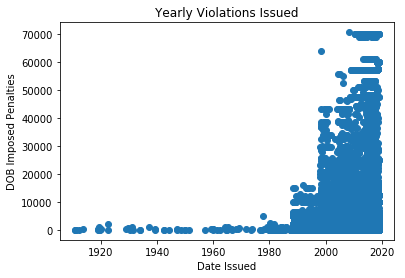

Aprox. Annual Vioaltions:  1473.416


In [6]:
penalty = dob['PENALITY_IMPOSED']
issued = dob['new_issue_date']
plt.plot_date(x= issued, y= penalty)
plt.ylabel('DOB Imposed Penalties')
plt.xlabel('Date Issued')
plt.title('Yearly Violations Issued')
plt.show()
print("Aprox. Annual Vioaltions: ", round(dob.PENALITY_IMPOSED.mean(),3))

<h4>Take a better look below at the total imposed penalties.</h4>

<p>As you can see there was a significant increase in Violations in the 90’s moving into the 2000’s. You can also say that the DOB has collected substantially more (at least seven times more) in ECB fines over the last 20 years.</p>
<p>Now that we can see the increase in violations over time, let’s look closer at the imposed penalties.</p> 
<h3>What are these violations costing the Respondents (Building Owners, Landlords or Tenants)?</h3>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


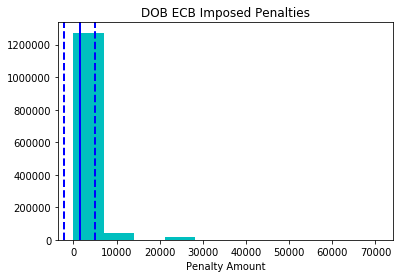

Total Imposed Penalties:  1966873016.44
Penalties Mean:  1473.42
Penalties Median:  400.0
Penalties Standard Deviation:  3584.34
Minimum Penalties:  0.0
Maximum Penalties:  70550.0


In [7]:
plt.hist(dob.PENALITY_IMPOSED ,bins = 10, color= 'c')

plt.axvline(dob.PENALITY_IMPOSED.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(dob.PENALITY_IMPOSED.mean() + dob.PENALITY_IMPOSED.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(dob.PENALITY_IMPOSED.mean() - dob.PENALITY_IMPOSED.std(), color='b', linestyle='dashed', linewidth=2)

plt.title('DOB ECB Imposed Penalties')
plt.xlabel('Penalty Amount')
plt.show();

print("Total Imposed Penalties: ", round(dob.PENALITY_IMPOSED.sum(),2))
print("Penalties Mean: ",round(dob.PENALITY_IMPOSED.mean(),2))
print("Penalties Median: ", round(dob.PENALITY_IMPOSED.median(), 2))
#print("Penalty Variance: ", round(np.var(dob.PENALITY_IMPOSED),2)) 
print("Penalties Standard Deviation: ", round(dob.PENALITY_IMPOSED.std(),2))
#print("Standard Error: ", round(np.std((dob.PENALITY_IMPOSED) / np.sqrt(len(dob.PENALITY_IMPOSED))), 2)) 
print("Minimum Penalties: ", dob.PENALITY_IMPOSED.min())
print("Maximum Penalties: ", dob.PENALITY_IMPOSED.max());
#print("Penalty Mode: ", dob.PENALITY_IMPOSED.mode()) ;

<p>When we analyze the data there are several things to consider here. The first ting that stands out to me is that the imposed penalty amounts standard deviation is considerably larger than the mean. What does that tell us about the data?</p>

<p>The chart shows us that several of the violations are below 10000. As we saw earlier, the fines were predominately in this same range before the 90's.</p>

<h3>How many imposed penalties have zero balances in this data set and why?</h3>

Text(0.5, 1.0, 'Zero Balance Imposed Penalty')

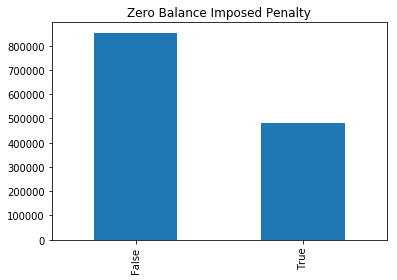

Zero Balance Imposed Penalties:  481431
Amount of Penalties greater than Zero:  853476


In [8]:
zero_pen= dob.loc[lambda df: dob['PENALITY_IMPOSED'] < 1, :]
penalties = dob.loc[lambda df: dob['PENALITY_IMPOSED'] >= 1, :]

amt_due = pd.DataFrame(dob.PENALITY_IMPOSED == 0)
amt_due = pd.DataFrame(amt_due.PENALITY_IMPOSED.value_counts())
amt_due.plot(kind='bar', legend=False)
plt.title('Zero Balance Imposed Penalty')
plt.show()
print("Zero Balance Imposed Penalties: ", len(zero_pen))
print("Amount of Penalties greater than Zero: ", len(penalties))

As we can see above over half of the violations given by the DOB result in a zero balance imposed penalty.

<p>We have already observed above that before the 2000's the imposed penalties were relativley low.</p>


<h3>What other variables are causing these low or zero balances?</h3>

Text(0, 0.5, 'ECB Violation Status')

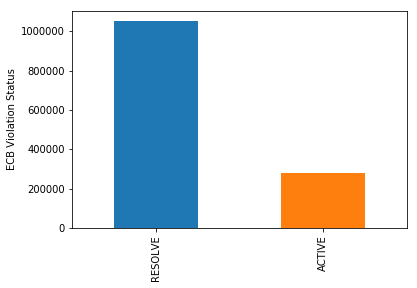

RESOLVE    1052875
ACTIVE      282037
Name: ECB_VIOLATION_STATUS, dtype: int64
RESOLVED VIOLATIONS WITH ZERO BALANCE:  452766
ACTIVE VIOLATIONS WITH ZERO BALANCE:  28665


In [51]:
active_vos = dob.loc[lambda df: dob['ECB_VIOLATION_STATUS'] == "ACTIVE", :]
resolved_vos = dob.loc[lambda df: dob['ECB_VIOLATION_STATUS'] =='RESOLVE', :]
active_vos_zero = active_vos.loc[lambda df: active_vos['PENALITY_IMPOSED'] == 0, :]
resolved_vos_zero= resolved_vos.loc[lambda df: resolved_vos['PENALITY_IMPOSED'] ==0, :]



dob.ECB_VIOLATION_STATUS.value_counts().plot(kind='bar',legend=False)
plt.ylabel('ECB Violation Status')
plt.show()

print(dob.ECB_VIOLATION_STATUS.value_counts())
print("RESOLVED VIOLATIONS WITH ZERO BALANCE: ", len(resolved_vos_zero))
print("ACTIVE VIOLATIONS WITH ZERO BALANCE: ", len(active_vos_zero))

<p>As we can see the data tells us a lot about the violations. We can see that The Active violations seem to have a higher balance. The Resolved Violtions makeup for most of the zero balance imposed penalties.</p>

<p>To summarize, I would conclude that since most of the DOB violations result in no penalties, and that more violations are resolved than active the DOB does have the saftey of the public in it's best interest.</p>
<h3>Although there has been a significant increase in violations, and potentially court appearances, I think that NYC's DOB is on the right track for making the city a safer more compliant city.</h3>

I think we barley scratched the surface here with this dataset. There are so many additional questions we could ask. Below are a few questions worth exploring in the near future:

What is the frequency of violations (inspections) based on the time of year?

Do inspectors, or the DOB target specific areas, Boros, blocks?

Are certain inspectors repeating or trageting citations or infractions?

Is the respondent an NYC resident?

Does the severity of the violation have any weight on the violation?

What is the average amount of infractions per violation?

What is the averge amount of violations per respondent?

What is the average amount of violations per BIN, Boro, or Block?
